# Text Analysis of Journal MetaData

-----

### About dataset
- The data contains metadata of 399 published papers on cancer research till Jan 2022.

- The data contains details about journals i.e. publication ID, Title, Authors, Citations, First Author, Publication journal or book, publication data, and DOI, that are published on various cancer research topics.

- The data is being collected from `PubMed` site. 

### Aim of the study:
- To practice and perform Exploratory Data Analysis (EDA) on textual data.

- To make a word cloud of relevant texts. 

- To find <u>number of published articles on different phases of clinical trials</u>.

- To find recent and common trends in cancer research.

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
# import dataset
df = pd.read_csv('csv-cancernano-set.csv')
df.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,34910859,Efficacy and Safety of NVX-CoV2373 in Adults i...,"Dunkle LM, Kotloff KL, Gay CL, Áñez G, Adelgla...",N Engl J Med. 2022 Feb 10;386(6):531-543. doi:...,Dunkle LM,N Engl J Med,2022,2021/12/15,PMC8693692,NaN,10.1056/NEJMoa2116185
1,34495421,Phase I study of weekly nab-paclitaxel plus ca...,"Omori S, Harada H, Mori K, Hisamatsu Y, Tsubog...",Invest New Drugs. 2022 Feb;40(1):106-114. doi:...,Omori S,Invest New Drugs,2022,2021/09/08,NaN,NaN,10.1007/s10637-021-01155-w
2,35127902,Role of carbon nanotracers in lymph node disse...,"Zhao K, Shan BQ, Gao YP, Xu JY.",World J Clin Cases. 2022 Jan 21;10(3):870-881....,Zhao K,World J Clin Cases,2022,2022/02/07,PMC8790434,NaN,10.12998/wjcc.v10.i3.870
3,34907220,Application of green synthesized WO(3)-poly gl...,"Nasrollahpour H, Naseri A, Rashidi MR, Khalilz...",Sci Rep. 2021 Dec 14;11(1):23994. doi: 10.1038...,Nasrollahpour H,Sci Rep,2021,2021/12/15,PMC8671486,NaN,10.1038/s41598-021-03209-8
4,34923912,The transcatheter arterial chemoembolization c...,Su D.,Bioengineered. 2021 Dec;12(2):11124-11135. doi...,Su D,Bioengineered,2021,2021/12/20,PMC8810100,NaN,10.1080/21655979.2021.2001239


### Basic Analysis

In [5]:
# shape 
df.shape

(399, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PMID              399 non-null    int64 
 1   Title             399 non-null    object
 2   Authors           398 non-null    object
 3   Citation          399 non-null    object
 4   First Author      398 non-null    object
 5   Journal/Book      399 non-null    object
 6   Publication Year  399 non-null    int64 
 7   Create Date       399 non-null    object
 8   PMCID             129 non-null    object
 9   NIHMS ID          35 non-null     object
 10  DOI               378 non-null    object
dtypes: int64(2), object(9)
memory usage: 34.4+ KB


In [7]:
# publication year range
df['Publication Year'].nunique()

32

In [8]:
df['Publication Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991])

In [9]:
yearwise = df['Publication Year'].value_counts().reset_index(name='count')
yearwise.head()

,index,count
0,2021,32
1,2020,30
2,2017,27
3,2016,27
4,2019,26


In [10]:
import plotly.express as px

fig = px.bar(
    yearwise,
    y = 'index',
    x = 'count',
    orientation='h',
    color = 'count',
    text_auto=True
)

fig.update_traces(textposition='outside')
fig.update_layout(
    height=800,
    width=1000,
    title=dict(
        text='Year-wise Number of Publications on Cancer'
    ), 
    yaxis={
        'title':'year'
    },
    xaxis={
        'title':'No. of Publications'
    },
    bargap=0.2,
    showlegend=False
)

fig.show()

- The dataset contains 32 years of data from 1991 to January 2022.

- Highest number of papers are published on 2021.

In [11]:
df.columns

Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI'],
      dtype='object')

In [12]:
df['Create Date'] = pd.to_datetime(df['Create Date'])

In [13]:
# Month wise publication
import datetime as dt

df['Year'] = df['Create Date'].dt.year
df['Month'] = df['Create Date'].dt.month

In [14]:
df.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Year,Month
0,34910859,Efficacy and Safety of NVX-CoV2373 in Adults i...,"Dunkle LM, Kotloff KL, Gay CL, Áñez G, Adelgla...",N Engl J Med. 2022 Feb 10;386(6):531-543. doi:...,Dunkle LM,N Engl J Med,2022,2021-12-15,PMC8693692,NaN,10.1056/NEJMoa2116185,2021,12
1,34495421,Phase I study of weekly nab-paclitaxel plus ca...,"Omori S, Harada H, Mori K, Hisamatsu Y, Tsubog...",Invest New Drugs. 2022 Feb;40(1):106-114. doi:...,Omori S,Invest New Drugs,2022,2021-09-08,NaN,NaN,10.1007/s10637-021-01155-w,2021,9
2,35127902,Role of carbon nanotracers in lymph node disse...,"Zhao K, Shan BQ, Gao YP, Xu JY.",World J Clin Cases. 2022 Jan 21;10(3):870-881....,Zhao K,World J Clin Cases,2022,2022-02-07,PMC8790434,NaN,10.12998/wjcc.v10.i3.870,2022,2
3,34907220,Application of green synthesized WO(3)-poly gl...,"Nasrollahpour H, Naseri A, Rashidi MR, Khalilz...",Sci Rep. 2021 Dec 14;11(1):23994. doi: 10.1038...,Nasrollahpour H,Sci Rep,2021,2021-12-15,PMC8671486,NaN,10.1038/s41598-021-03209-8,2021,12
4,34923912,The transcatheter arterial chemoembolization c...,Su D.,Bioengineered. 2021 Dec;12(2):11124-11135. doi...,Su D,Bioengineered,2021,2021-12-20,PMC8810100,NaN,10.1080/21655979.2021.2001239,2021,12


In [15]:
# check null values
df.isna().sum()

PMID                  0
Title                 0
Authors               1
Citation              0
First Author          1
Journal/Book          0
Publication Year      0
Create Date           0
PMCID               270
NIHMS ID            364
DOI                  21
Year                  0
Month                 0
dtype: int64

In [16]:
# publications in 2021
df_21 = df[df['Year']==2021]
df_21.shape

(26, 13)

In [17]:
fig = px.pie(
    df_21,
    values='Month',
    names='Month',
    hole=0.3,
    title='Monthwise Publications in Year 2021 ',
    color_discrete_sequence=px.colors.sequential.ice,
)

fig.update_traces(textinfo='label+value+percent', textposition='inside')
fig.update_layout(
    width = 600,
    height=600
)
fig.show()

- In year 2021, in month of December highest number of papers published on Cancer research.

In [18]:
# Monthwise publication in 2020
df_20 = df[df['Year']==2020]

fig = px.pie(
    df_20,
    values='Month',
    names='Month',
    hole=0.3,
    title='Monthwise Publications in Year 2020 ',
    color_discrete_sequence=px.colors.sequential.ice,
)

fig.update_traces(textinfo='label+value+percent', textposition='inside')

fig.update_layout(
    width = 600,
    height=600
)
fig.show()

- In september highest number of papers wer published in year 2020

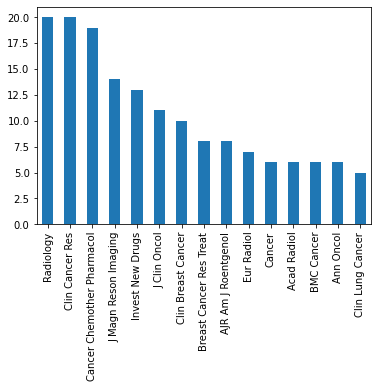

In [19]:
# Journal/Book
# Top 15 Journals with highest Publication
df['Journal/Book'].value_counts().head(15).plot(kind='bar');

- `Radiology` and `Clin Cancer Res` journals have highest publications followed by Cancer `Chemother Pharmacol`.

In [20]:
# Top First Authors with Multiple Publication
df['First Author'].value_counts().head(10)

Vogl TJ            6
Harisinghani MG    4
Karakatsanis A     3
Wang R             3
Fabi A             2
Li Y               2
Mergo PJ           2
Shi M              2
Schmidt KT         2
Chawla SP          2
Name: First Author, dtype: int64

### NLP 

On title column

In [21]:
df.columns

Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI', 'Year',
       'Month'],
      dtype='object')

In [22]:
data=df[["PMID",'Title','First Author','Journal/Book','Publication Year']]
data.head(10)

,PMID,Title,First Author,Journal/Book,Publication Year
0,34910859,Efficacy and Safety of NVX-CoV2373 in Adults i...,Dunkle LM,N Engl J Med,2022
1,34495421,Phase I study of weekly nab-paclitaxel plus ca...,Omori S,Invest New Drugs,2022
2,35127902,Role of carbon nanotracers in lymph node disse...,Zhao K,World J Clin Cases,2022
3,34907220,Application of green synthesized WO(3)-poly gl...,Nasrollahpour H,Sci Rep,2021
4,34923912,The transcatheter arterial chemoembolization c...,Su D,Bioengineered,2021
5,34753884,Phase II Study of the Modified Weekly Nab-pacl...,Yoshimura N,Am J Clin Oncol,2021
6,34637337,nab-Sirolimus for Patients With Malignant Peri...,Wagner AJ,J Clin Oncol,2021
7,34523232,Phase I/II study of biweekly nab-paclitaxel in...,Miyauchi E,Thorac Cancer,2021
8,33751208,Safety and antibody immune response of CHP-NY-...,Ishikawa T,Cancer Immunol Immunother,2021
9,34243976,Sequential Phase II clinical trials evaluating...,Krasner CN,Gynecol Oncol,2021


In [23]:
# Removal of Punctuations
import string

data['Title'] = data['Title'].apply(lambda text: text.translate(str.maketrans('','',string.punctuation)))

In [24]:
# Stopword Removal
from gensim.parsing.preprocessing import remove_stopwords

data['Title'] = data['Title'].apply(lambda text: " ".join([remove_stopwords(word) for word in text.split()]))

In [25]:
data

,PMID,Title,First Author,Journal/Book,Publication Year
0,34910859,Efficacy Safety NVXCoV2373 Adults United ...,Dunkle LM,N Engl J Med,2022
1,34495421,Phase I study weekly nabpaclitaxel plus carbo...,Omori S,Invest New Drugs,2022
2,35127902,Role carbon nanotracers lymph node dissectio...,Zhao K,World J Clin Cases,2022
3,34907220,Application green synthesized WO3poly glutami...,Nasrollahpour H,Sci Rep,2021
4,34923912,The transcatheter arterial chemoembolization c...,Su D,Bioengineered,2021
...,...,...,...,...,...
394,8305692,The MR tomography focal liver lesions super...,Duda SH,Rofo,1994
395,8319063,Abdominal MRI negative contrast agent,Bach-Gansmo T,Br J Radiol,1993
396,8472481,Phase III trial oral magnetic particles MRI ...,MacVicar D,Clin Radiol,1993
397,1428729,Phase I clinical trial pharmacokinetic evalua...,Kattan J,Invest New Drugs,1992


In [26]:
data.iloc[1]

PMID                                                         34495421
Title               Phase I study  weekly nabpaclitaxel plus carbo...
First Author                                                  Omori S
Journal/Book                                         Invest New Drugs
Publication Year                                                 2022
Name: 1, dtype: object

In [27]:
# Replacing the Phase I/II/II with a joint word 
# i.e. Phase I becomes PhaseI

import re

def renameTrial(text):
    text = re.sub(r'(Phase|phase)?\s([0-3]|[I]{1,3})', r"\1\2", text)

    return text



In [28]:
data['Title'] = data['Title'].apply(lambda text: renameTrial(text))

In [29]:
data

,PMID,Title,First Author,Journal/Book,Publication Year
0,34910859,Efficacy Safety NVXCoV2373 Adults United ...,Dunkle LM,N Engl J Med,2022
1,34495421,PhaseI study weekly nabpaclitaxel plus carbop...,Omori S,Invest New Drugs,2022
2,35127902,Role carbon nanotracers lymph node dissectio...,Zhao K,World J Clin Cases,2022
3,34907220,Application green synthesized WO3poly glutami...,Nasrollahpour H,Sci Rep,2021
4,34923912,The transcatheter arterial chemoembolization c...,Su D,Bioengineered,2021
...,...,...,...,...,...
394,8305692,The MR tomography focal liver lesions super...,Duda SH,Rofo,1994
395,8319063,Abdominal MRI negative contrast agent,Bach-Gansmo T,Br J Radiol,1993
396,8472481,PhaseIII trial oral magnetic particles MRI ...,MacVicar D,Clin Radiol,1993
397,1428729,PhaseI clinical trial pharmacokinetic evaluat...,Kattan J,Invest New Drugs,1992


In [30]:
# Tokenization and Stemming
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

data['Title'] = data['Title'].apply(lambda sentence: " ".join([PorterStemmer().stem(word) for word in word_tokenize(sentence)]))

In [31]:
data

,PMID,Title,First Author,Journal/Book,Publication Year
0,34910859,efficaci safeti nvxcov2373 adult unit state me...,Dunkle LM,N Engl J Med,2022
1,34495421,phasei studi weekli nabpaclitaxel plu carbopla...,Omori S,Invest New Drugs,2022
2,35127902,role carbon nanotrac lymph node dissect advanc...,Zhao K,World J Clin Cases,2022
3,34907220,applic green synthes wo3poli glutam acid nanob...,Nasrollahpour H,Sci Rep,2021
4,34923912,the transcathet arteri chemoembol combin targe...,Su D,Bioengineered,2021
...,...,...,...,...,...
394,8305692,the mr tomographi focal liver lesion superpara...,Duda SH,Rofo,1994
395,8319063,abdomin mri neg contrast agent,Bach-Gansmo T,Br J Radiol,1993
396,8472481,phaseiii trial oral magnet particl mri abdomen...,MacVicar D,Clin Radiol,1993
397,1428729,phasei clinic trial pharmacokinet evalu doxoru...,Kattan J,Invest New Drugs,1992


#### WordCloud

In [32]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stop_words_english = set(stopwords.words('english'))

totalwords = []
sentences = data['Title'].values


for i in sentences:
    for word in i.split():
        if word not in stop_words_english:
            totalwords.append(word)


totalwords

filtered_words = ' '.join(totalwords)

In [33]:
len(totalwords)

5176

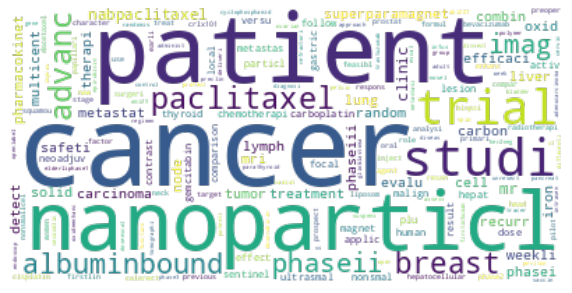

In [51]:
import wordcloud

freq = nltk.FreqDist(totalwords)
wc = wordcloud.WordCloud(mode='RGBA',background_color=None).generate_from_frequencies(freq)


plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- Current trend cancer research is nanoparticle, albuminbound compounds, and drugs like `paclitaxel` which is a `Taxol` product.

## Count of different phase of clinical trials in the dataset

Number of occurrences of phases

In [35]:
print("Total occurrences of Phase 0: {}".format(freq['phase0']))

Total occurrences of Phase 0: 1


In [36]:
# Phase 1
print("Total occurrences of Phase 1: ",freq['phasei'] + freq['phase1']) 

Total occurrences of Phase 1:  47


In [37]:
# Phase 2
print("Total occurrences of Phase 2: ",freq['phaseii'] + freq['phase2'])

Total occurrences of Phase 2:  74


In [38]:
# Phase 3
print("Total concurrences of Phase 3: ",freq['phaseiii'] + freq['phase3'])

Total concurrences of Phase 3:  29


In [39]:

phases = pd.DataFrame({"Phases":['phase1','phase2','phase3','phase0'], "No.of occurrences":[47, 74, 29, 1]})
phases

,Phases,No.of occurrences
0,phase1,47
1,phase2,74
2,phase3,29
3,phase0,1


In [40]:
# Dump the frequency dictionary to the json
import json

with open("cancer_journal.json", 'w') as file:
    json.dump(freq, file)

In [41]:
df1 = pd.DataFrame({
    'text': freq.keys(),
    'count':freq.values()
})

df1.sort_values(by='count', ascending=0).head(25)

,text,count
24,cancer,176
17,patient,152
54,nanoparticl,143
8,studi,119
86,trial,99
95,paclitaxel,85
20,advanc,84
46,breast,74
94,albuminbound,64
62,phaseii,63


In [42]:
# export csv file
df1.to_csv("cancer_journal_wordcount.csv")

print("CSV file generated")

CSV file generated


### Conclusion:

- With time, research on cancer is rapidly growing.

- 74 papers have been published on Phase-II clinical Trial, followed by 47 on Phase-I, 29 on Phase-III.

- Most cancer researches are happening on `Albumin bound` compounds, `Nano-particles`, and `Taxol` substitutes.



#### Note:

- The analysis is done using the data as it was fetched from the website. 
- No personal level manipulation of data has been done.
- Though the total number of actual published will be more than the fetched data, this method of analysis can work to analyze and understand the trend in cancer or any other type of research works better.